# Project: Titanic Data Set_Analysis, Visualisation & Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
#Importing titanic dataset into a pandas dataframe 
titanic = pd.read_csv("titanic.csv")

## Data Exploration

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
titanic.shape

(887, 8)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Data Analysis and Visualisation to explore data further

Do not need the name column as it will not be used in the data analysis or visualisation. Hence dropping it

In [6]:
titanic.drop("Name", axis =1, inplace = True)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [8]:
titanic["Pclass"].value_counts().unique

<bound method Series.unique of 3    487
1    216
2    184
Name: Pclass, dtype: int64>

There are 3 unique Pclass or passenger classes, with the most number of people in 3rd class

Visualizing the Pclass Counts using seaborn countplots

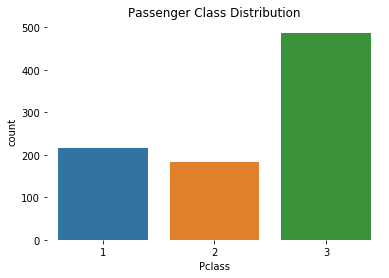

In [9]:
plt.title("Passenger Class Distribution")
sns.despine(left = True, bottom = True)
sns.countplot(x="Pclass", data = titanic)

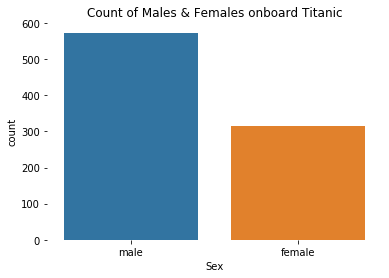

In [10]:
# Countplot to see the distribution of males and females abord titanic
plt.title("Count of Males & Females onboard Titanic")
sns.despine(left = True, bottom = True )
sns.countplot(x="Sex", data = titanic)

Let us see the distribution of Males & Females in different Classes

Text(0.5, 1, 'Sex Distribution by Passenger Class')

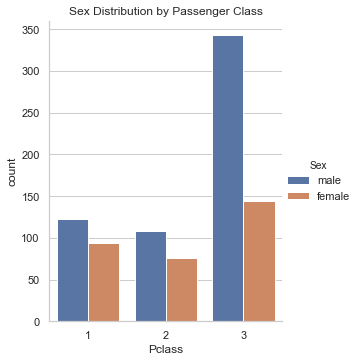

In [11]:
sns.set(style = "whitegrid")
g = sns.catplot(x="Pclass", hue="Sex",data=titanic, kind="count", height=5, aspect = 0.8)
plt.title("Sex Distribution by Passenger Class")

Pclass 2 has the least populated i.e. roughly 110 males and 75 females. In comparison, Pclass 3 has the highest population across both genders i.e. roughly 380 males and 140 females 

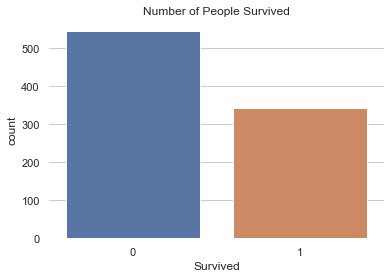

In [12]:
# count plot for the Survived column
plt.title("Number of People Survived")
sns.set(style = "white")
sns.despine(left = True, bottom = True)
sns.countplot(x = "Survived", data = titanic)

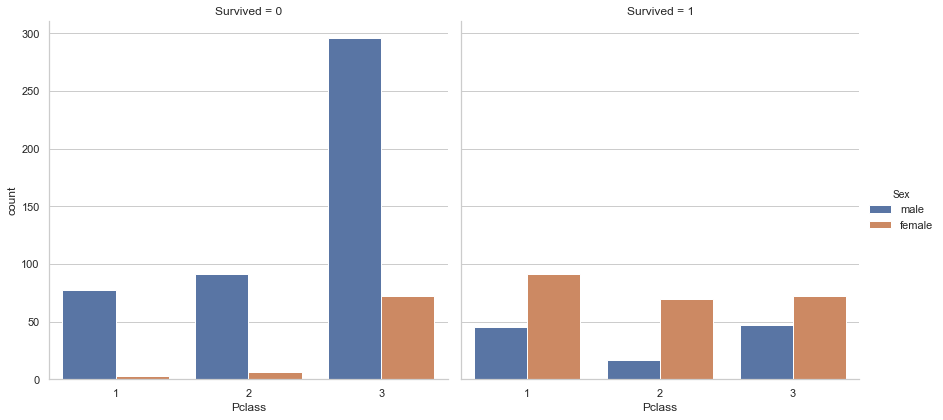

In [13]:
sns.set(style = "whitegrid")
g = sns.catplot(x="Pclass", col="Survived", hue="Sex", data = titanic, kind = "count", height = 6)

#### Interesting observations:
1. Most of the females from passenger class 1 and 2 survived
2. Females survived vs not survived in class 3 is almost same
3. More than 87% of males from Class 3 could not survive

In [14]:
titanic.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


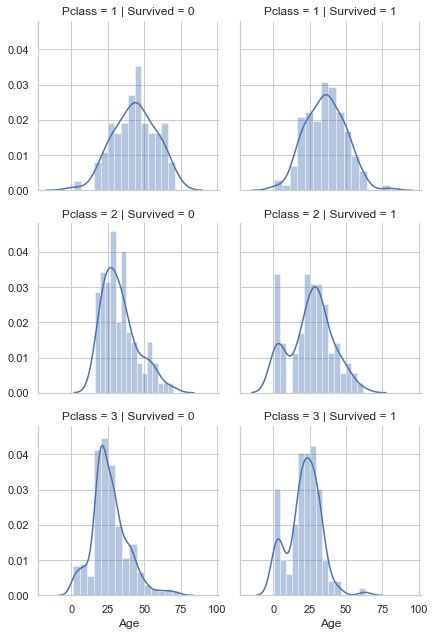

In [15]:
#Analysing Age
g = sns.FacetGrid(titanic, col = "Survived", row = "Pclass", height = 3)
g.map(sns.distplot, "Age", bins = 15).add_legend()

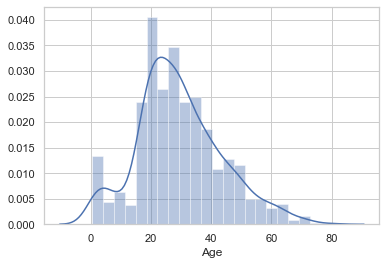

In [16]:
sns.distplot(titanic["Age"])

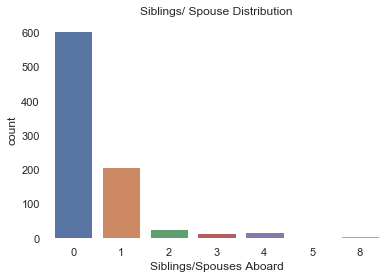

In [17]:
#Countplot of Siblings / Spouses aboard
sns.set(style = "white")
ax = sns.countplot(x="Siblings/Spouses Aboard", data = titanic)
ax.set_title("Siblings/ Spouse Distribution")
sns.despine(left = True, bottom = True)

600 passengers travelled without spouses or siblings, 200 had 1 spouse/sibling

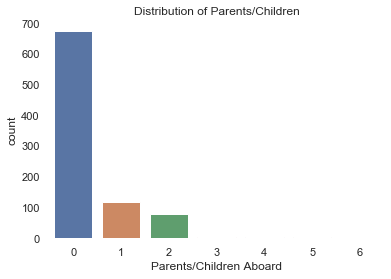

In [18]:
#Countplot for Parents aboard
sns.countplot(x="Parents/Children Aboard", data = titanic)
plt.title("Distribution of Parents/Children")
sns.despine(left = True, bottom = True)

I will use descibe() method to see the basic stats for "Fares" column.
This will determine the range parameters that can be used to generate a histogram to visualise the fares distribution.

In [19]:
titanic['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

In [20]:
titanic.loc[titanic["Fare"]==0]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
178,0,3,male,36.0,0,0,0.0
261,0,1,male,40.0,0,0,0.0
269,1,3,male,25.0,0,0,0.0
275,0,2,male,21.0,0,0,0.0
300,0,3,male,19.0,0,0,0.0
411,0,2,male,22.0,0,0,0.0
463,0,2,male,21.0,0,0,0.0
478,0,2,male,37.0,0,0,0.0
594,0,3,male,49.0,0,0,0.0
630,0,1,male,30.0,0,0,0.0


There are 15 passengers for who, the fare is recorded as zero. This is definitely an outlier for fares as you would not expect anyone to travel on board "Titanic" for free. But since the goal here is to predict the survival rate, I will leave these rows as is.

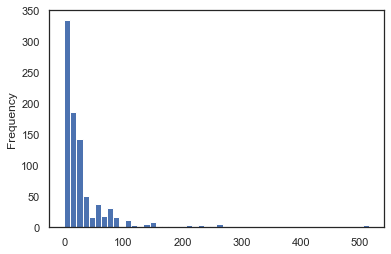

In [21]:
titanic["Fare"].plot.hist(bins = 50, range = (0,515))

Clearly, the fare of $512.329 is an outlier. So excluding the range for that value, let us get a close peek at the fares distribution

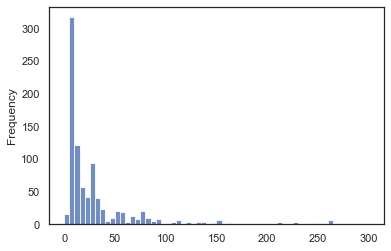

In [22]:
titanic["Fare"].plot.hist(bins = 60, alpha = 0.8, range = (0,300))

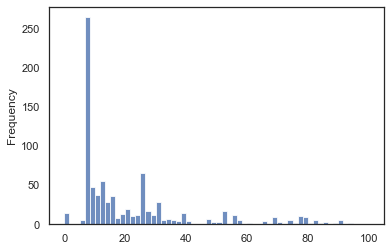

In [23]:
titanic["Fare"].plot.hist(bins = 60, alpha = 0.8, range = (0,100))

Majority of fares are around the $8, followed by 25 mark

In [24]:
#Trying to find the isNull values in any columns
titanic.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

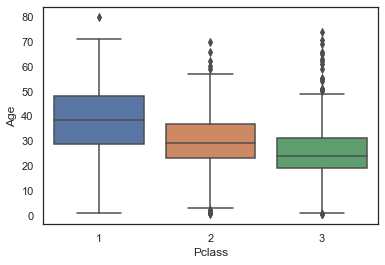

In [25]:
#boxplot using seaborn
sns.boxplot(x="Pclass", y="Age", data=titanic)

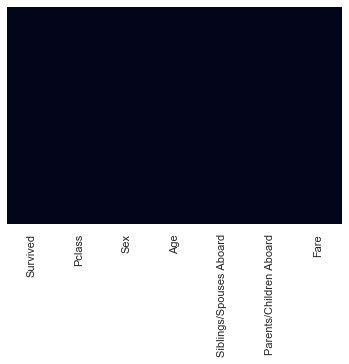

In [26]:
# Heatmap depiction of isnull values spread across the dataset
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False)

## Data Wrangling

Now that we have done the exploratory data analysis and data visualisation and drawn the noted patterns and correlations. I shall now convert the non numeric dataset to numeric in order to train our data set using logistic regression algorithm 

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [28]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


We only have "Sex" as the object type which holds either Male/Female

In [29]:
titanic["Sex"].value_counts().unique

<bound method Series.unique of male      573
female    314
Name: Sex, dtype: int64>

Converting the Sex column to numeric values using get_dummies function of pandas

In [30]:
Sex_Numeric = pd.get_dummies(titanic["Sex"], drop_first = True)

In [31]:
Sex_Numeric.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
#Merging titanic dataframe with Sex_Numeric series value horizontally (that is matched row wise)
titanic = pd.concat([titanic,Sex_Numeric], axis=1)

In [33]:
titanic.drop("Sex", axis=1, inplace = True)

In [34]:
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [35]:
#Rename male to Sex_Male to make it more readable and obvious
titanic.rename(columns={"male":"Sex_Male"}, inplace = True)

In [36]:
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_Male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [37]:
#Checking datatypes of all columns one last time
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Sex_Male                   887 non-null uint8
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.6 KB


## Machine Learning - Training Data

Separating the data elements into two.
X = independent variables of the dataset
y = dependent variable or outcome

In [38]:
X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

In [39]:
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_Male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Logistic Regression

In [43]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
lr_prediction = logreg.predict(X_test)

The predicted 'Survived' figures for test data set are:

In [45]:
lr_prediction

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)

#### Logistic Regression - Accuracy Score

Accuracy check of prediction using: 
1. Confusion Matrix
2. Accuracy Score

In [47]:
#Accuracy Check using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_prediction)

array([[131,  31],
       [ 30,  75]], dtype=int64)

In [49]:
#1. Accuracy Prediction using Confusion Matrix
confusion_array = confusion_matrix(y_test, lr_prediction)
true_posneg = confusion_array[0,0]+confusion_array[1,1]
accuracy_percentage = true_posneg/(confusion_array[0,1]+confusion_array[1,0]+true_posneg)
print(accuracy_percentage)

0.7715355805243446


In [50]:
#2. Accuracy prediction using Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_prediction)

0.7715355805243446

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rd_prediction = random_forest.predict(X_test)

#### Accuracy Score for Random Forest Prediction:

In [52]:
accuracy_score(y_test,rd_prediction)

0.7827715355805244

### Precision Score, Recall Score & F1 Scores comparison - Logistic Regression and Random Forest Predictions

In [53]:
#Precision & Recall Scores Comparison between Logistic Regression and Random Forest Predictions
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score
#cross_val_predict for Random forest
cv_rf_predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
print("Random Forest - Precision Score is: ",precision_score(y_train,cv_rf_predictions))
print("Random Forest - Recall Score is: ", recall_score(y_train,cv_rf_predictions))
#cross_val_predict for Logistic Regression
cv_lr_predictions = cross_val_predict(logreg, X_train, y_train, cv=3)
print("Logistic Regression - Precision Score is: ",precision_score(y_train,cv_lr_predictions))
print("Logistic Regression - Recall Score is: ", recall_score(y_train,cv_lr_predictions))

Random Forest - Precision Score is:  0.7844036697247706
Random Forest - Recall Score is:  0.7215189873417721
Logistic Regression - Precision Score is:  0.771689497716895
Logistic Regression - Recall Score is:  0.7130801687763713


In [54]:
#F1 Scores Comparison
from sklearn.metrics import f1_score
print("Random Forest - F1 Score: ", f1_score(y_train, cv_rf_predictions))
print("Logistic Regression - F1 Score: ", f1_score(y_train,cv_lr_predictions))

Random Forest - F1 Score:  0.7516483516483515
Logistic Regression - F1 Score:  0.7412280701754386


#### Overall observation is that Random Forest Precision and Recall scores are marginally better than Logistic Regression (by less than a %). F1 score agrees with the same observation too